<a href="https://colab.research.google.com/github/AfrizalDS/PCVK_Ganjil_2021/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TUGAS PRAKTIKUM**

*   ### **Nama  : Afrizal Dwi Septian**
*   ### **NIM   : 2241720122**
*   ### **Kelas : TI-2A**



1.   Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”. 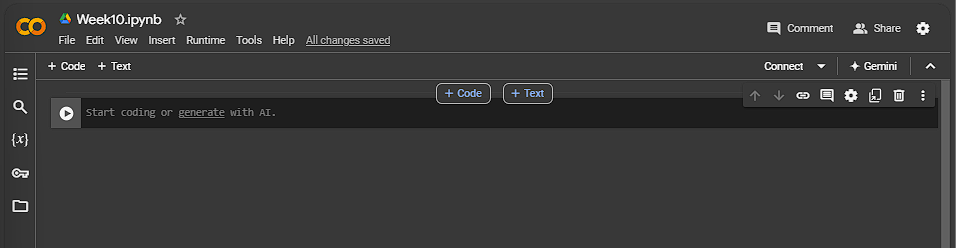
Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.



In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2.   Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.



In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

3.   Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.



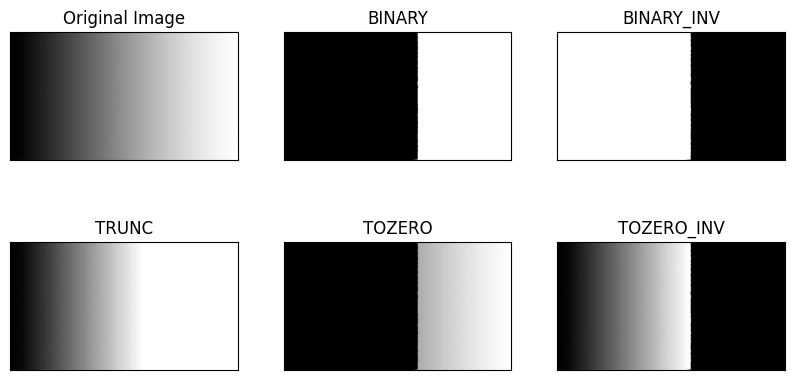

In [6]:
# Baca citra grayscale (misal citra gradasi hitam-putih)
image = cv2.imread('/content/drive/MyDrive/PCVK_IMAGE/images/Images/gradient.jpg', cv2.IMREAD_GRAYSCALE)

# Threshold value
threshold = 170

# BINARY
binary = np.where(image > threshold, 255, 0).astype(np.uint8)

# BINARY_INV
binary_inv = np.where(image > threshold, 0, 255).astype(np.uint8)

# TRUNC
trunc = np.where(image > threshold, threshold, image).astype(np.uint8)

# TOZERO
tozero = np.where(image > threshold, image, 0).astype(np.uint8)

# TOZERO_INV
tozero_inv = np.where(image > threshold, 0, image).astype(np.uint8)

# Plot hasilnya
images = [image, binary, binary_inv, trunc, tozero, tozero_inv]
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']

plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

4.   Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image **balloon.jpg** agar terlihat beda antara hasil otsu’s dengan global threshold biasa)


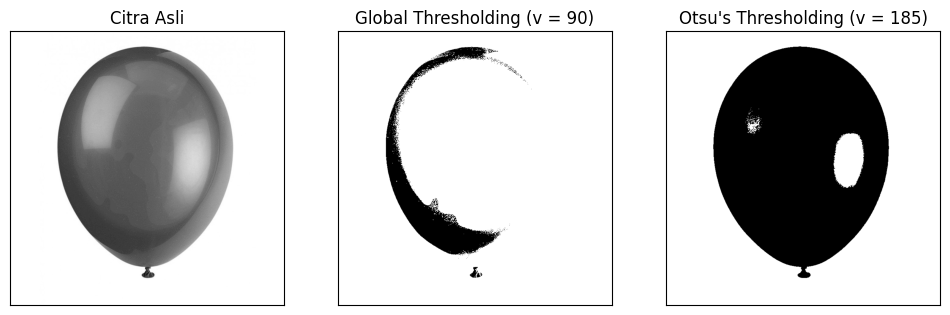

In [17]:
# Fungsi untuk Otsu's Thresholding
def otsu_threshold(image):
    # Hitung histogram
    histogram, bins = np.histogram(image.ravel(), 256, [0, 256])

    # Hitung probabilitas kumulatif
    total_pixels = image.shape[0] * image.shape[1]
    current_max, threshold = 0, 0
    sum_total, sum_foreground = 0, 0
    weight_background, weight_foreground = 0, 0

    for i in range(256):
        sum_total += i * histogram[i]

    sum_background = 0

    # hreshold yang memaksimalkan between-class variance
    for i in range(256):
        weight_background += histogram[i]
        if weight_background == 0:
            continue
        weight_foreground = total_pixels - weight_background
        if weight_foreground == 0:
            break

        sum_background += i * histogram[i]
        mean_background = sum_background / weight_background
        mean_foreground = (sum_total - sum_background) / weight_foreground

        # Between Class Variance
        between_class_variance = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2

        # Simpan nilai threshold yang memaksimalkan between-class variance
        if between_class_variance > current_max:
            current_max = between_class_variance
            threshold = i

    # Thresholding dengan nilai threshold Otsu
    otsu_result = np.where(image > threshold, 255, 0).astype(np.uint8)
    return otsu_result, threshold

# Membaca citra balon
image = cv2.imread('/content/drive/MyDrive/PCVK_IMAGE/images/Images/balloon.jpg', cv2.IMREAD_GRAYSCALE)

# Otsu Thresholding
otsu_result, otsu_threshold_value = otsu_threshold(image)

# Global Thresholding biasa dengan nilai 90
global_threshold_value = 90
global_result = np.where(image > global_threshold_value, 255, 0).astype(np.uint8)

# Hasilnya
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Asli')
axes[0].set_xticks([])
axes[0].set_yticks([])


plt.subplot(1, 3, 2)
plt.imshow(global_result, cmap='gray')
plt.title(f'Global Thresholding (v = {global_threshold_value})')
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.subplot(1, 3, 3)
plt.imshow(otsu_result, cmap='gray')
plt.title(f'Otsu\'s Thresholding (v = {otsu_threshold_value})')
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.show()

5.   Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.
Petunjuk:
  *   anda dapat gunakan cv.calcHist untuk menampilkan histogram.
  *    link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html
  Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
  *    yaitu mask. Jika diset **None**, maka keseluruhan image akan dihitung
  histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
  dimasking **warna putih** yang akan dihitung histogramnya (dari contoh
  dibawah dinamakan dengan **Citra Segment**).










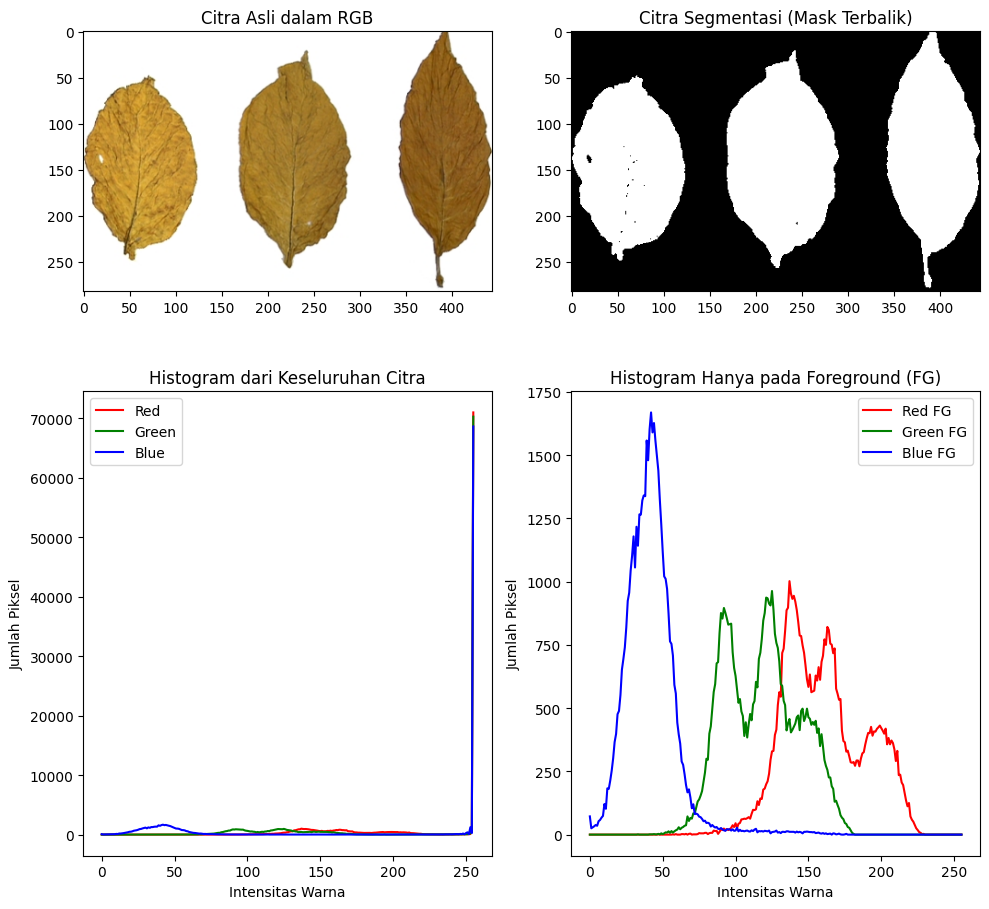

In [30]:
import cv2 as cv

# Langkah 1: Membaca gambar
tobacco_img = cv.imread('/content/drive/MyDrive/PCVK_IMAGE/images/Images/tobacco.jpg')
image_rgb = cv.cvtColor(tobacco_img, cv.COLOR_BGR2RGB)

# Langkah 2: Membuat mask untuk menandai foreground (dengan sedikit modifikasi nilai threshold)
gray_image = cv.cvtColor(tobacco_img, cv.COLOR_BGR2GRAY)
_, mask = cv.threshold(gray_image, 180, 255, cv.THRESH_BINARY_INV)  # Membalik foreground jadi putih

# Langkah 3: Hitung histogram keseluruhan citra untuk setiap channel RGB
hist_total_r = cv.calcHist([tobacco_img], [2], None, [256], [0, 256])
hist_total_b = cv.calcHist([tobacco_img], [0], None, [256], [0, 256])
hist_total_g = cv.calcHist([tobacco_img], [1], None, [256], [0, 256])

# Langkah 4: Hitung histogram hanya pada foreground dengan menggunakan mask (untuk setiap channel RGB)
hist_fg_r = cv.calcHist([image_rgb], [0], mask, [256], [0, 256])
hist_fg_g = cv.calcHist([image_rgb], [1], mask, [256], [0, 256])
hist_fg_b = cv.calcHist([image_rgb], [2], mask, [256], [0, 256])

# Langkah 5: Tampilkan hasilnya
plt.figure(figsize=(10, 10))

# Plot 1: Tampilkan citra asli dalam RGB
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Citra Asli dalam RGB')

# Plot 2: Tampilkan citra segmentasi dengan mask
plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Citra Segmentasi (Mask Terbalik)')

# Plot 3: Histogram dari keseluruhan citra untuk setiap channel RGB
plt.subplot(2, 2, 3)
plt.plot(hist_total_r, color='r', label='Red')
plt.plot(hist_total_g, color='g', label='Green')
plt.plot(hist_total_b, color='b', label='Blue')
plt.title('Histogram dari Keseluruhan Citra')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Piksel')
plt.legend()

# Plot 4: Histogram hanya untuk foreground (FG) objek
plt.subplot(2, 2, 4)
plt.plot(hist_fg_r, color='r', label='Red FG')
plt.plot(hist_fg_g, color='g', label='Green FG')
plt.plot(hist_fg_b, color='b', label='Blue FG')
plt.title('Histogram Hanya pada Foreground (FG)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Piksel')
plt.legend()

plt.tight_layout()
plt.show()

6.   Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)



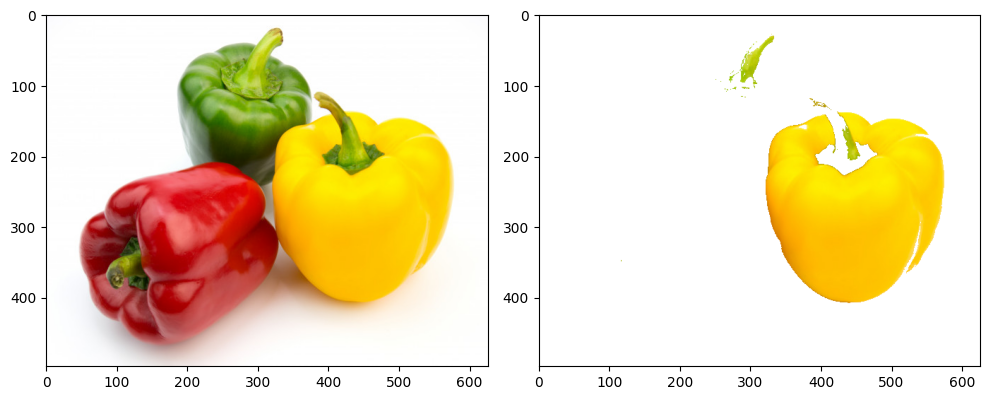

In [38]:

# Langkah 1: Baca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK_IMAGE/images/Images/peppers.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # Ubah dari BGR ke RGB

# Langkah 2: Ubah gambar menjadi data 2D untuk K-Means
pixel_values = image.reshape((-1, 3))  # Bentuk ulang gambar menjadi array 2D
pixel_values = np.float32(pixel_values)  # Ubah ke tipe data float32

# Langkah 3: Tetapkan k dan lakukan K-Means clustering
k = 5  # Jumlah cluster yang digunakan
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Langkah 4: Ubah label hasil clustering ke warna
segmented_image = centers[labels.flatten()]  # Ambil nilai pusat cluster
segmented_image = segmented_image.reshape(image.shape)  # Ubah kembali ke bentuk gambar asli

# Langkah 5: Ubah segmented image ke HSV untuk segmentasi warna kuning
hsv_image = cv.cvtColor(segmented_image.astype(np.uint8), cv.COLOR_RGB2HSV)

# Definisikan batas warna kuning dalam ruang warna HSV
lower_yellow = np.array([20, 100, 100])  # Batas bawah warna kuning
upper_yellow = np.array([30, 255, 255])  # Batas atas warna kuning

# Membuat mask untuk warna kuning
yellow_mask = cv.inRange(hsv_image, lower_yellow, upper_yellow)

# Langkah 6: Terapkan mask pada gambar asli
result = cv.bitwise_and(image, image, mask=yellow_mask)

# Langkah 7: Ubah latar belakang menjadi putih
# Buat latar belakang putih
white_background = np.full(image.shape, 255, dtype=np.uint8)  # Membuat gambar putih dengan ukuran yang sama

# Gabungkan hasil segmentasi dengan latar belakang putih
result_with_white_bg = np.where(yellow_mask[:, :, np.newaxis] == 255, result, white_background)

# Menampilkan gambar asli
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('on')

# Menampilkan hasil segmentasi
plt.subplot(1, 2, 2)
plt.imshow(result_with_white_bg)
plt.axis('on')

plt.tight_layout()
plt.show()

Saat anda menampilkan warna tertentu, jelaskan kendala yang di hadapi dan mengapa
hal itu terjadi.

**Jawab:**  
  Ketika menampilkan warna tertentu dalam proses segmentasi citra, beberapa kendala dapat muncul, seperti batasan warna yang tidak tepat dalam ruang warna HSV. Jika batas bawah dan atas untuk warna kuning tidak mencakup semua nuansa kuning yang ada dalam citra, hasil mask yang dihasilkan dapat menjadi hitam, sehingga saat diterapkan pada citra asli, hanya menghasilkan gambar hitam. Selain itu, kesalahan dalam konversi warna dan pengaturan K-Means yang tidak tepat juga dapat memengaruhi hasil segmentasi. Misalnya, jika jumlah cluster yang dipilih dalam K-Means terlalu rendah atau tinggi, warna kuning mungkin tidak terdeteksi dengan baik.

  Untuk mengatasi masalah ini, penting untuk melakukan penyesuaian pada batas warna dan parameter K-Means. Memvisualisasikan mask secara terpisah sebelum penerapan pada citra asli dapat membantu memastikan bahwa mask berfungsi sesuai harapan. Eksperimen dengan nilai HSV yang berbeda dan memahami sifat warna dalam gambar juga sangat penting untuk mencapai segmentasi warna yang berhasil.

7.   Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda
pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code
dan hasil image di modul ini.



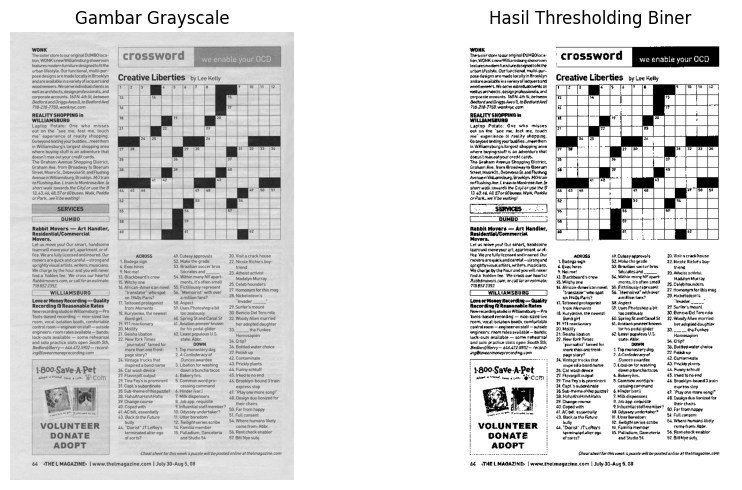

In [39]:
# Langkah 1: Baca gambar
crossword_img = cv.imread('/content/drive/MyDrive/PCVK_IMAGE/images/Images/crossword.jpg')

# Langkah 2: Ubah gambar ke grayscale
gray_crossword = cv.cvtColor(crossword_img, cv.COLOR_BGR2GRAY)

# Langkah 3: Lakukan thresholding biner menggunakan Otsu
ret, binary_crossword = cv.threshold(gray_crossword, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Langkah 4: Tampilkan hasil
plt.figure(figsize=(10, 5))

# Tampilkan gambar grayscale
plt.subplot(1, 2, 1)
plt.imshow(gray_crossword, cmap='gray')
plt.title('Gambar Grayscale')
plt.axis('off')

# Tampilkan hasil thresholding biner
plt.subplot(1, 2, 2)
plt.imshow(binary_crossword, cmap='gray')
plt.title('Hasil Thresholding Biner')
plt.axis('off')

plt.tight_layout()
plt.show()